In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

###### Обязательная часть
Вам необходимо провести базовый **EDA** выбранного набора данных.

**Требования к анализу:**

    построить не менее 4 визуализаций различных видов;
    каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
    по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).


Источник данных для **EDA-анализа** - рейтинг высших учебных заведений России "Национальное признание": https://univer.expert/akademicheskiye-reytingi-vuzov-2022/obshchiy-reyting-2022/,  


Для анализа интересен по следующим соображениям:
1. Наличие бальной характеристики. 
2. Наличие разбивки по регионам (городам).
3. Наличие дополнительной категориальной характеристики - участие в проекте 2030

Сам рейтинг имеет серьёзные ограничения по областям применения о чем говорят и сами разработчики.
https://univer.expert/akademicheskiye-reytingi-vuzov-2021/metodologiya-reytinga-2021/#12    
См. например позицию Университета "Иннополис"



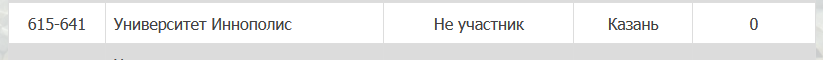

Исходные ВУЗов с ненулевым рейтингом в количестве 614 строк данные методом Copy->Past были скопированы со страницы https://univer.expert/akademicheskiye-reytingi-vuzov-2022/obshchiy-reyting-2022/ в файл формата "MS Excel" **high_school_rating.xlsx** .


Название и значения столбцов:


* rank - позиция в рейтинге (int8)
* name - полное наименование ВУЗа (object)
* city  - город расположения 
* status - статус участия в национальном проекте «Приоритет-2030» (object)
* points - количество набранных баллов по методике оценивания (float32)





In [4]:
# прочитаем данные в датафрейм pandas:
df = pd.read_excel('high_school_rating.xlsx', 
                   sheet_name='2022', 
                   dtype = {
                        "Rank": 'Float64',  
                        "Points": 'Float64' # только float64! float16 не работает в сводных таблицах!!
                            }
                  )
# Сброс ограничений на количество отображаемых символов в записи
pd.set_option('display.max_colwidth', None)
# Сброс ограничений на количество выводимых строк
pd.set_option('display.max_rows', None)
#pd.set_option('display.colheader_justify', 'right' )
df

,Rank,Name,Status,City,Points
0,1.0,Московский государственный университет имени М.В. Ломоносова,«Над программой»,Москва,2332.90
1,2.0,Санкт-Петербургский государственный университет,«Над программой»,Санкт-Петербург,876.35
2,3.0,Национальный исследовательский университет “Высшая школа экономики”,Первая лига,Москва,792.18
3,4.0,Московский государственный технический университет имени Н.Э. Баумана (национальный исследовательский университет),Первая лига,Москва,680.88
4,5.0,Санкт-Петербургский политехнический университет Петра Великого,Первая лига,Санкт-Петербург,598.65
5,6.0,Российская академия народного хозяйства и государственной службы при Президенте Российской Федерации,Первая лига,Москва,566.56
6,7.0,Первый Московский государственный медицинский университет имени И.М. Сеченова,Вторая лига,Москва,564.70
7,8.0,Казанский (Приволжский) федеральный университет,Первая лига,Казань,549.76
8,9.0,Российский экономический университет имени Г.В. Плеханова,Базовый грант,Москва,508.68
9,10.0,Уральский федеральный университет имени первого Президента Российской Федерации Б.Н. Ельцина,Первая лига,Екатеринбург,490.80


**Общие характеристики:** 

In [5]:
df.info()
# Увидеть пропуски (они были) и исправить в исходнике
df[df.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    614 non-null    float64
 1   Name    614 non-null    object 
 2   Status  614 non-null    object 
 3   City    614 non-null    object 
 4   Points  614 non-null    float64
dtypes: float64(2), object(3)
memory usage: 24.1+ KB


,Rank,Name,Status,City,Points


In [6]:
df['Status'].unique()

array(['«Над программой»', 'Первая лига', 'Вторая лига', 'Базовый грант',
       'Третья лига', 'Не участник', 'Кандидат на участие'], dtype=object)

In [7]:
# уточним типы данных для столбца Status - категориальной переменной:
df['Status'] = df['Status'].astype('category')
# установим порядок по умолчанию
df["Status"].cat.set_categories(['«Над программой»',
                                   'Первая лига','Вторая лига',
                                   'Третья лига', 'Базовый грант', 
                                   'Кандидат на участие','Не участник'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Rank    614 non-null    float64 
 1   Name    614 non-null    object  
 2   Status  614 non-null    category
 3   City    614 non-null    object  
 4   Points  614 non-null    float64 
dtypes: category(1), float64(2), object(2)
memory usage: 20.3+ KB


Общее статистическое описание датафрейма:
    

In [8]:
df.describe()

,Rank,Points
count,614.000000,614.000000
mean,307.500000,50.361840
std,177.390811,135.514467
min,1.000000,0.030000
25%,154.250000,3.152500
50%,307.500000,13.990000
75%,460.750000,36.775000
max,614.000000,2332.900000


Даже без дополнительного анализа виден разрыв между сильными и слабыми ВУЗами России

In [9]:
IQR_points = df['Points'].quantile(0.75) - df['Points'].quantile(0.25)
print(f'Межквартильный размах для всех ВУЗов: {IQR_points:.2f}')

Межквартильный размах для всех ВУЗов: 33.62


Лучшие ВУЗы России с точки зрения описательной статистики очевидно попадут в нетипичные выбросы:

In [10]:
# Расчёт выбросов для столбца "Points" по «внутренним границам»:
q1 = df['Points'].quantile(0.25)
q3 = df['Points'].quantile(0.75)
iqr = q3 - q1
lower_bound_int = q1 - (1.5 * iqr) 
upper_bound_int = q3 + (1.5 * iqr)
print ('Значение "выбросов" столбца рейтинга по "внутренним границам" (1,5 межквартильного размаха):')
df_abnormal = df[~df['Points'].between(lower_bound_int, upper_bound_int, inclusive=True)]
df_abnormal

Значение "выбросов" столбца рейтинга по "внутренним границам" (1,5 межквартильного размаха):


,Rank,Name,Status,City,Points
0,1.0,Московский государственный университет имени М.В. Ломоносова,«Над программой»,Москва,2332.90
1,2.0,Санкт-Петербургский государственный университет,«Над программой»,Санкт-Петербург,876.35
2,3.0,Национальный исследовательский университет “Высшая школа экономики”,Первая лига,Москва,792.18
3,4.0,Московский государственный технический университет имени Н.Э. Баумана (национальный исследовательский университет),Первая лига,Москва,680.88
4,5.0,Санкт-Петербургский политехнический университет Петра Великого,Первая лига,Санкт-Петербург,598.65
5,6.0,Российская академия народного хозяйства и государственной службы при Президенте Российской Федерации,Первая лига,Москва,566.56
6,7.0,Первый Московский государственный медицинский университет имени И.М. Сеченова,Вторая лига,Москва,564.70
7,8.0,Казанский (Приволжский) федеральный университет,Первая лига,Казань,549.76
8,9.0,Российский экономический университет имени Г.В. Плеханова,Базовый грант,Москва,508.68
9,10.0,Уральский федеральный университет имени первого Президента Российской Федерации Б.Н. Ельцина,Первая лига,Екатеринбург,490.80


In [11]:
print(f'Общее количество "нетипичных ВУЗов": {len(df_abnormal)}')
print('_________________________________________________________')
print('В разбивке по городам:')
df_abnormal.groupby(['City'])['Points'].agg('count').sort_values(ascending=False)



Общее количество "нетипичных ВУЗов": 82
_________________________________________________________
В разбивке по городам:


City
Москва             26
Санкт-Петербург    10
Краснодар           3
Казань              3
Томск               3
Саратов             3
Ростов-на-Дону      2
Уфа                 2
Воронеж             2
Пермь               2
Нижний Новгород     2
Самара              2
Белгород            2
Ставрополь          2
Тюмень              2
Кемерово            1
Владивосток         1
Долгопрудный        1
Екатеринбург        1
Иркутск             1
Волгоград           1
Челябинск           1
Красноярск          1
Курск               1
Магнитогорск        1
Новосибирск         1
Омск                1
Рязань              1
Саранск             1
Симферополь         1
Барнаул             1
Name: Points, dtype: int64

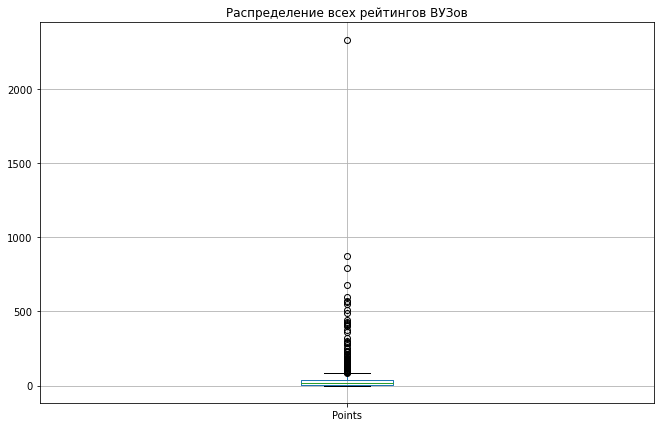

In [12]:
# очень хорошо подходит для поиска выбросов!
df['Points'].plot(kind='box',
                   title='Распределение всех рейтингов ВУЗов', grid=True)

**Вывод:** Интересно что в зону "выбросов" попадают исключительно ВУЗы с верхней границы бокс-плота. Выбросов в нижней части рейтинга не имеется. 

Как будет показано в дальнейшем  элитная группой **"Над программой"** состоящая из Московского и Санкт-Петербургского университетов вносит серьёзные искажения в общую статистику... Постоим бокс-плот без этой группы:

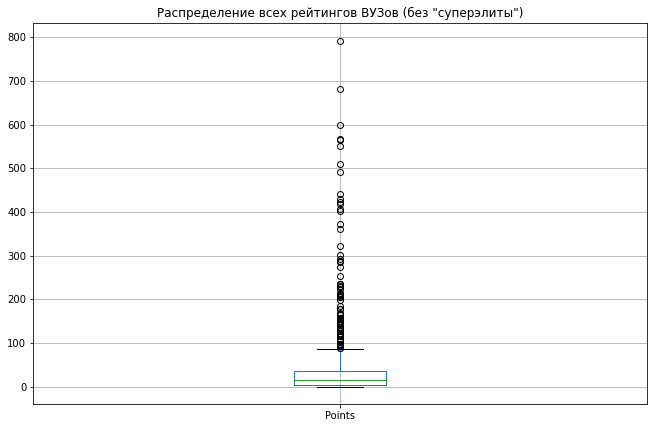

In [13]:
# очень хорошо подходит для поиска выбросов!
df['Points'].loc[df['Status']!='«Над программой»'].plot(kind='box',
                   title='Распределение всех рейтингов ВУЗов (без "суперэлиты")', grid=True)

**Вывод**: Даже при исключении МГУ и СПбГУ статистические показатели всего массива вузов России оставляют желать лучшего. Группа "элитарных" вузов не укладывается в общую тенденцию и в бокс-плоте по всему датафрейму представлена в виде выбросов по верхней границе.

Подключим к анализу категориальный показатель. Проанализируем рейтинги ВУЗов по группам программы **"Приоритет 2030"**:

In [14]:
#Проанализируем рейтинги по группам программы Приоритет 2030
display(df.groupby(['Status'])['Points'].agg(['count', 'median','min','max']))
all_in_prog = len(df.loc[df['Status'].isin([ '«Над программой»', 
                                             'Базовый грант',
                                             'Первая лига', 
                                             'Вторая лига', 
                                             'Третья лига'])])

#op_developers_df.style.bar(align='mid')

all_in_rating = len(df)

print(f'Всего в программу "Приоритет-2030" отобрано  {all_in_prog} вуза(ов)')
print(f'из общего числа в {all_in_rating} вузов указанных в рейтинге')
print(f'что составляет {(all_in_prog/all_in_rating)*100:.1f} % от общего количества')

,count,median,min,max
Status,,,,
«Над программой»,2,1604.625,876.35,2332.90
Первая лига,18,383.540,66.71,792.18
Вторая лига,16,145.185,14.09,564.70
Третья лига,12,194.985,96.72,440.76
Базовый грант,57,83.200,0.44,508.68
Кандидат на участие,15,33.660,10.07,154.02
Не участник,494,9.325,0.03,401.14


Всего в программу "Приоритет-2030" отобрано  105 вуза(ов)
из общего числа в 614 вузов указанных в рейтинге
что составляет 17.1 % от общего количества


что достаточно точно соответствует действительности:


Ещё один пример ограничения методики рейтинга:

In [15]:
    df.loc[(df['Status']=='Базовый грант')&((df['Points']<1.))]

,Rank,Name,Status,City,Points
576,577.0,Российский институт театрального искусства – ГИТИС,Базовый грант,Москва,0.44


Сильный театральный вуз, отобранный в программу **"Приоритет-2030"**  имеет практически нулевой рейтинг.

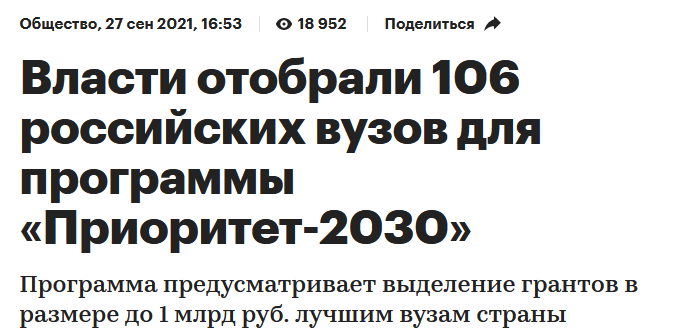

In [16]:
groups_by_status = df[['Name', 'Status']].groupby('Status').count()

groups_by_status 

,Name
Status,
«Над программой»,2
Первая лига,18
Вторая лига,16
Третья лига,12
Базовый грант,57
Кандидат на участие,15
Не участник,494


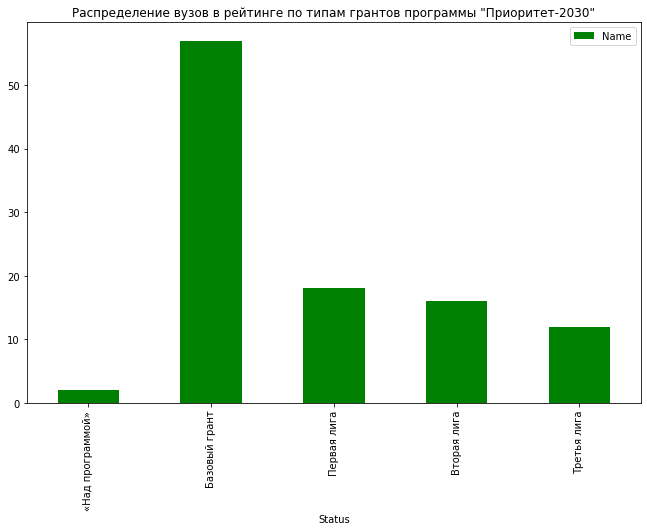

In [17]:
 groups_by_status.loc[['«Над программой»', 
                      'Базовый грант', 
                      'Первая лига', 
                      'Вторая лига', 
                      'Третья лига', 
                       ]].plot.bar(color="green", 
                                   title='Распределение вузов в рейтинге по типам грантов программы "Приоритет-2030"'
                                  )

Бокс-плоты статистических характеристик групп вузов по признаку вовлечения в  программу **"Приоритет 2030"**:

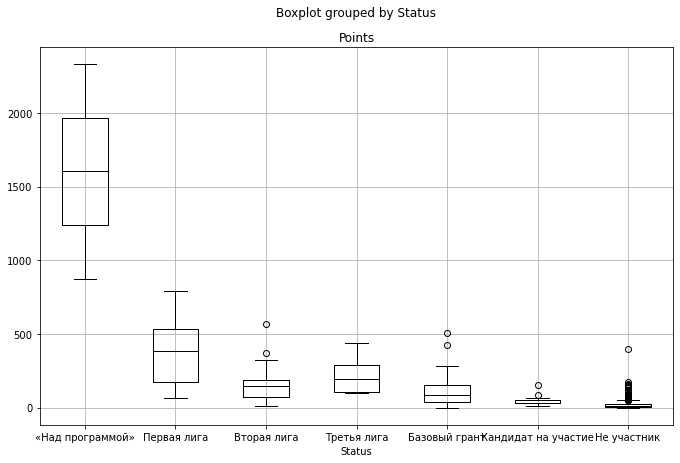

In [18]:
df.boxplot(column=['Points'], by='Status',grid=True, color='black')

Визуализация наглядно демонстрирует серьёзных разрыв в статистических показателях между элитной группой **"Над программой"** состоящей из Московского и Санкт-Петербургского университетов и остальными учебными заведениями высшей школы России.

Попробуем исключить элитную группу из рассмотрения:

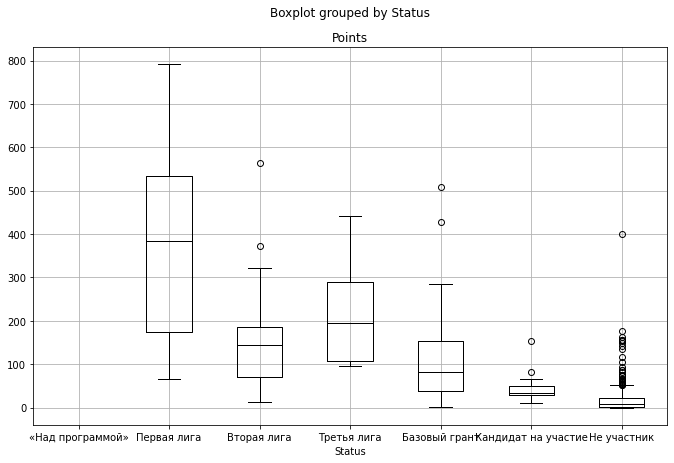

In [19]:
df.loc[df['Status']!='«Над программой»'].boxplot(column=['Points'], by='Status',grid=True, color='black')

**Вывод:** Выбросы  и показатели рейтинга близкие к максимальным значения из бокс-плота категории **Базовый грант** интересны с точки зрения возможности получения данными вузами специальной части гранта. Как было выяснено в дальнейшем исследовании, составители данного рейтинга объединили вузы из **групп 1,2,3** получившие специальные части грантов по  трекам **«Исследовательское лидерство»** и **«Территориальное и отраслевое лидерство»** обозначив их как **Первая, Вторая и Третья лиги.**

In [20]:
# Посчитаем точно верхнюю границу бокс-плота: 
q3 = df.loc[(df['Status'] == 'Базовый грант')].quantile(0.75)
print('Третий квартиль рейтинга:', q3.Points)

Третий квартиль рейтинга: 154.54


Возможный список высших учебных заведений-претендентов на **специальную часть гранта** по программе **"Приоритет 2030"** по данным рейтинга **"Национальное достояние"**:

In [21]:
df.loc[(df['Status'] == 'Базовый грант') & (df['Points'] >= q3.Points)]

,Rank,Name,Status,City,Points
8,9.0,Российский экономический университет имени Г.В. Плеханова,Базовый грант,Москва,508.68
11,12.0,Российский университет дружбы народов,Базовый грант,Москва,428.26
22,23.0,Национальный исследовательский Московский государственный строительный университет,Базовый грант,Москва,284.01
25,26.0,Волгоградский государственный технический университет,Базовый грант,Волгоград,235.66
26,27.0,Донской государственный технический университет,Базовый грант,Ростов-на-Дону,235.48
28,29.0,Национальный исследовательский университет “МЭИ”,Базовый грант,Москва,229.44
29,30.0,Казанский национальный исследовательский технологический университет,Базовый грант,Казань,227.08
30,31.0,Саратовский национальный исследовательский государственный университет имени Н.Г. Чернышевского,Базовый грант,Саратов,223.93
31,32.0,Национальный исследовательский Мордовский государственный университет имени Н.П. Огарева,Базовый грант,Саранск,214.71
34,35.0,Самарский национальный исследовательский университет имени акад. С.П. Королева,Базовый грант,Самара,209.14


Анализ полученного списка показывает, что в нем нет явных ауцайдеров, в частности среди московсикх вуз отобраны вполне достойные вузы приближающиеся к высшей лиге и являющиеся лучшими по своим направлениям подготовки.

Интересно посмотреть выбросы из групп **"Кандитат на участие"** и **"Не участник"**. По показателям данного рейтинга они бы могли бы войти в число грантополучателей базовой части гранта.

In [22]:
df.loc[(df['Status'] == 'Кандидат на участие') & (df['Points'] > 80)|
       (df['Status'] == 'Не участник') & (df['Points'] > 80)]

,Rank,Name,Status,City,Points
15,16.0,Финансовый университет при Правительстве Российской Федерации,Не участник,Москва,401.14
41,42.0,Рязанский государственный радиотехнический университет,Не участник,Рязань,177.23
44,45.0,Магнитогорский государственный технический университет имени Г.И. Носова,Не участник,Магнитогорск,163.49
46,47.0,Российский государственный педагогический университет имени А.И. Герцена,Не участник,Санкт-Петербург,156.35
48,49.0,Тюменский индустриальный университет,Не участник,Тюмень,155.90
49,50.0,Самарский государственный технический университет,Не участник,Самара,155.23
51,52.0,Российский государственный социальный университет,Не участник,Москва,154.09
52,53.0,Московский педагогический государственный университет,Кандидат на участие,Москва,154.02
54,55.0,Воронежский государственный технический университет,Не участник,Воронеж,149.88
58,59.0,Санкт-Петербургский государственный экономический университет,Не участник,Санкт-Петербург,143.16


**Наблюдение:** Анализом выбросов выявлен интересный факт: если основываться на исследуемом рейтинге, то **Финансовый университет при Правительстве Российской Федерации** (максимальный выброс категории "Не участник") мог бы легко претендовать не только на базовый, но и на специальный грант программы **"Приоритет-2030"**.

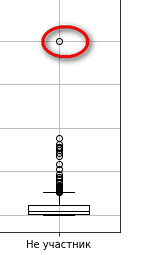

Выясним что понимают составители рейтинга под ***первой, второй и третьей лигами***, поскольку в положении о программе такие термины не используются:

In [23]:
first_league = df[['Name','Status','City','Points']].loc[(df['Status'] == 'Первая лига')]
first_league.style.bar(align='mid')

,Name,Status,City,Points
2,Национальный исследовательский университет “Высшая школа экономики”,Первая лига,Москва,792.180000
3,Московский государственный технический университет имени Н.Э. Баумана (национальный исследовательский университет),Первая лига,Москва,680.880000
4,Санкт-Петербургский политехнический университет Петра Великого,Первая лига,Санкт-Петербург,598.650000
5,Российская академия народного хозяйства и государственной службы при Президенте Российской Федерации,Первая лига,Москва,566.560000
7,Казанский (Приволжский) федеральный университет,Первая лига,Казань,549.760000
9,Уральский федеральный университет имени первого Президента Российской Федерации Б.Н. Ельцина,Первая лига,Екатеринбург,490.800000
12,Национальный исследовательский ядерный университет МИФИ,Первая лига,Москва,422.610000
13,Национальный исследовательский Томский государственный университет,Первая лига,Томск,417.690000
14,Национальный исследовательский Томский политехнический университет,Первая лига,Томск,406.270000
17,Национальный исследовательский технологический университет “МИСиС”,Первая лига,Москва,360.810000


In [24]:
print (f'Всего вузов в группе "Первая лига": {len(first_league)}')

Всего вузов в группе "Первая лига": 18


По количеству и составу данная группа соответствует получателям спецгрантов 1 группы вузов из треков **«Исследовательское лидерство»** и **«Территориальное и отраслевое лидерство»**

In [25]:
second_league = df[['Name','Status','City','Points']].loc[(df['Status'] == 'Вторая лига')]
second_league.style.bar(align='mid', color='yellow')

,Name,Status,City,Points
6,Первый Московский государственный медицинский университет имени И.М. Сеченова,Вторая лига,Москва,564.700000
16,Национальный исследовательский Нижегородский государственный университет имени Н.И. Лобачевского,Вторая лига,Нижний Новгород,373.090000
18,Российский национальный исследовательский медицинский университет имени Н.И. Пирогова,Вторая лига,Москва,322.060000
27,Московский государственный институт международных отношений (университет),Вторая лига,Москва,235.370000
42,Белгородский государственный национальный исследовательский университет,Вторая лига,Белгород,169.230000
45,Новосибирский государственный технический университет,Вторая лига,Новосибирск,157.880000
47,Санкт-Петербургский государственный электротехнический университет “ЛЭТИ” имени В.И. Ульянова (Ленина),Вторая лига,Санкт-Петербург,156.170000
55,Дальневосточный федеральный университет,Вторая лига,Владивосток,149.090000
60,Российский химико-технологический университет имени Д.И. Менделеева,Вторая лига,Москва,141.280000
65,Крымский федеральный университет имени В.И. Вернадского,Вторая лига,Симферополь,123.260000


In [26]:
print (f'Всего вузов в группе "Вторая лига": {len(second_league)}')

Всего вузов в группе "Вторая лига": 16


In [27]:
third_league = df[['Name','Status','City','Points']].loc[(df['Status'] == 'Третья лига')]
third_league.style.bar(align='mid', color='green')

,Name,Status,City,Points
10,Южный федеральный университет,Третья лига,Ростов-на-Дону,440.760000
19,Сибирский федеральный университет,Третья лига,Красноярск,300.280000
20,Ставропольский государственный аграрный университет,Третья лига,Ставрополь,293.020000
21,Южно-Уральский государственный университет (национальный исследовательский университет),Третья лига,Челябинск,287.130000
23,Уфимский государственный нефтяной технический университет,Третья лига,Уфа,273.100000
33,Российский государственный аграрный университет – МСХА имени К.А. Тимирязева,Третья лига,Москва,212.310000
40,Уфимский университет науки и технологий,Третья лига,Уфа,177.660000
57,Иркутский национальный исследовательский технический университет,Третья лига,Иркутск,144.680000
70,Омский государственный технический университет,Третья лига,Омск,108.520000
71,Нижегородский государственный технический университет имени Р.Е. Алексеева,Третья лига,Нижний Новгород,106.490000


In [28]:
print (f'Всего вузов в группе "Третья лига": {len(third_league)}')

Всего вузов в группе "Третья лига": 12


По количеству и составу данная группа соответствует получателям спецгрантов 3 группы вузов из треков **«Исследовательское лидерство»** и **«Территориальное и отраслевое лидерство»**

In [29]:
print (f'Всего выделено специальных грантов: {len(first_league) + len(second_league) + len(third_league)}')

Всего выделено специальных грантов: 46


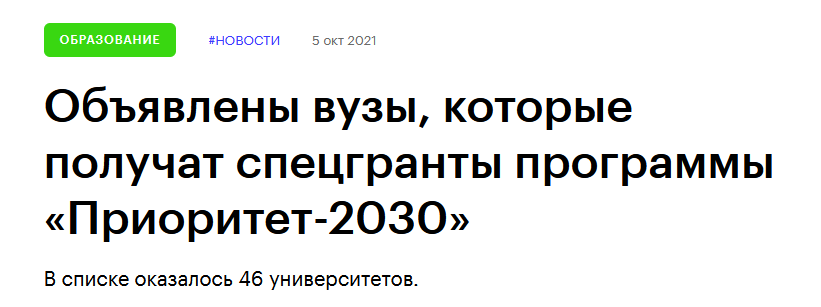

https://skillbox.ru/media/education/obyavleny-vuzy-kotorye-poluchat-spetsgranty-programmy-prioritet2030/?ysclid=ld337u8dxq156011505

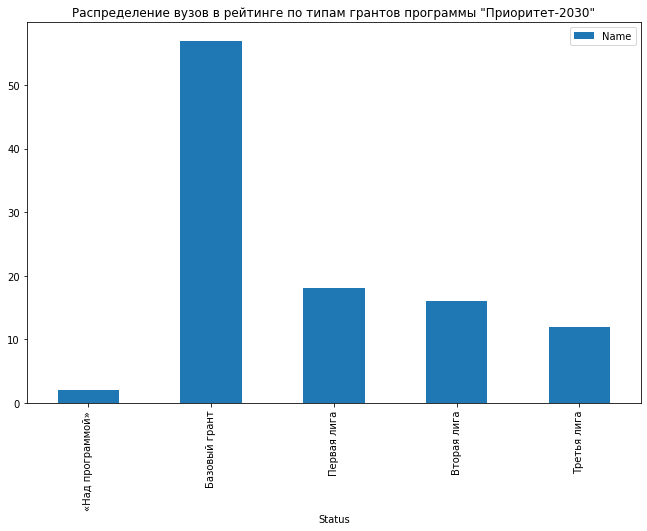

In [30]:
groups_by_status.loc[['«Над программой»', 
                      'Базовый грант', 
                      'Первая лига', 
                      'Вторая лига', 
                      'Третья лига', 
                       ]].plot(kind='bar', title='Распределение вузов в рейтинге по типам грантов программы "Приоритет-2030"'
                                )

Группировка вузов по географическому 
расположению:

In [31]:
df_city_group = df.groupby(['City'])['Points'].agg(['count',
                                                    'median',
                                                    'min',
                                                    'max', 'sum']).sort_values(by='count',  ascending=False)
df_city_group.sort_values(by='sum', ascending=False)

,count,median,min,max,sum
City,,,,,
Москва,101,18.360,0.10,2332.90,11477.27
Санкт-Петербург,60,16.780,0.41,876.35,3354.51
Казань,16,11.450,0.13,549.76,1037.82
Томск,6,72.125,22.90,417.69,1024.77
Ростов-на-Дону,9,31.220,0.25,440.76,787.88
Екатеринбург,16,16.385,0.84,490.80,685.97
Нижний Новгород,10,18.595,3.16,373.09,648.19
Уфа,9,22.140,1.80,273.10,624.53
Самара,13,14.760,2.76,209.14,560.30


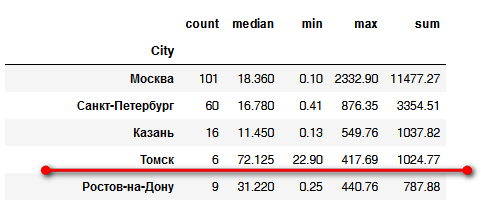

**Вывод:** Анализ первой пятерки городов с максимальным совокупным рейтингом вузов выявил следующее:
1. Максимальный размах между максмальным и минимальным значением в рейтинге вузов города Москвы и низкое значение медианы говорят о том что около половины высших учебных заведений столицы либо не вписываются в методику оценки, либо действительно имеет крайне низкий образовательный уровень.
2. Похожая на Москву картина наблюдается и в Санкт-Петербурге.
2. Крайне интересный результат показывает Томск -совокупный рейтинг по шести образовательным учреждениям вплотную приближается к в  два с лишним раза многочисленной по числу вузов Казани и опережает Ростов-на-Дону, в котором имеется 9 вузов. Самый высокий показатель медианы говорит об отсутствии в Томске "сверхслабых" вузов.

In [32]:
df.loc[df['City']=='Томск']

,Rank,Name,Status,City,Points
13,14.0,Национальный исследовательский Томский государственный университет,Первая лига,Томск,417.69
14,15.0,Национальный исследовательский Томский политехнический университет,Первая лига,Томск,406.27
76,77.0,Сибирский государственный медицинский университет,Третья лига,Томск,96.72
124,125.0,Томский государственный университет систем управления и радиоэлектроники,Вторая лига,Томск,47.53
162,163.0,Томский государственный архитектурно-строительный университет,Кандидат на участие,Томск,33.66
219,220.0,Томский государственный педагогический университет,Не участник,Томск,22.90


Статистический расчет подтверждается практикой - 67% вузов Томска получают спецгранты по программе **"Приоритет-2030"**.

**Города с количеством вузов в рейтинге более 10:**

In [33]:
df_city_group_10 = df_city_group.loc[df_city_group['count'] >= 10]
df_city_group_10

,count,median,min,max,sum
City,,,,,
Москва,101,18.360,0.10,2332.90,11477.27
Санкт-Петербург,60,16.780,0.41,876.35,3354.51
Екатеринбург,16,16.385,0.84,490.80,685.97
Казань,16,11.450,0.13,549.76,1037.82
Воронеж,16,10.135,0.03,149.88,549.23
Новосибирск,16,13.620,1.21,157.88,430.99
Самара,13,14.760,2.76,209.14,560.30
Омск,12,19.410,0.32,108.52,295.80
Нижний Новгород,10,18.595,3.16,373.09,648.19


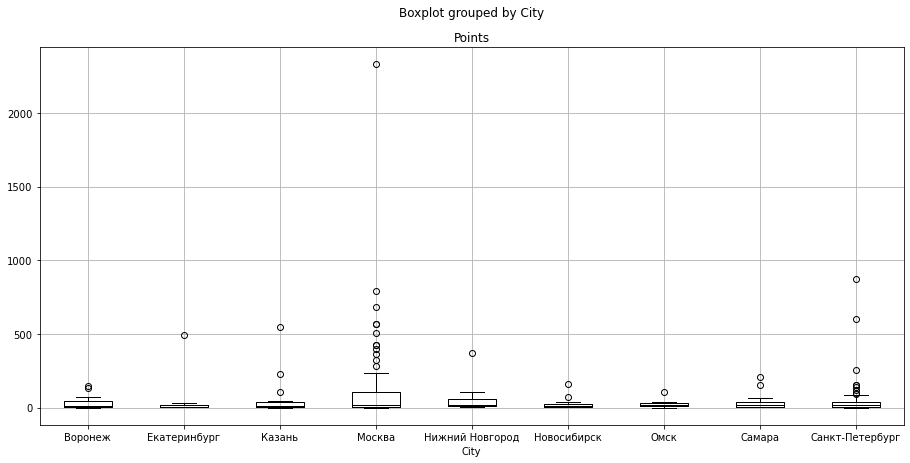

In [34]:
#Увеличим размер поля вывода графики
rcParams['figure.figsize'] = 15,7

df_city_10 = df.loc[df['City'].isin([ 'Москва',
'Санкт-Петербург',
'Екатеринбург',
'Казань',
'Воронеж',
'Новосибирск',
'Самара',
'Омск',
'Нижний Новгород'])]


df_city_10.boxplot(column=['Points'], by='City',grid=True, color='black')

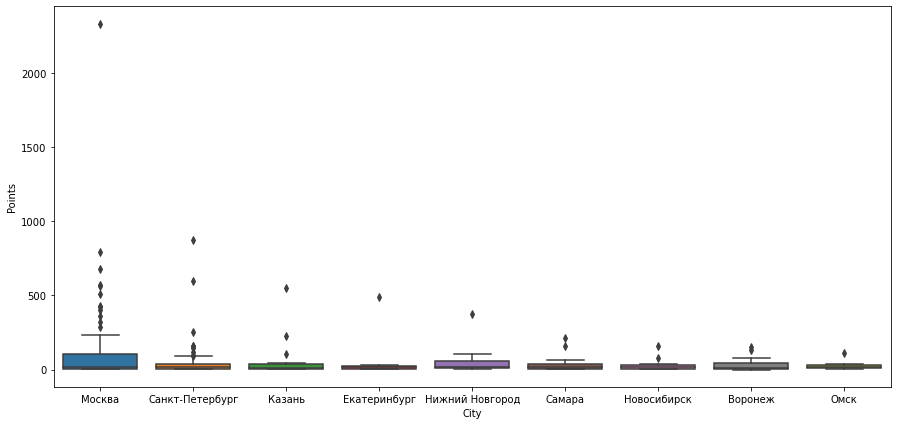

In [35]:
# Тоже самое в библиотеке Seaborn
sns.boxplot( x=df_city_10['City'], y=df_city_10['Points'] )

In [36]:

pd.pivot_table(df_city_10,
               index='City', values='Points', aggfunc=[sum,len])


,sum,len
,Points,Points
City,,
Воронеж,549.23,16.0
Екатеринбург,685.97,16.0
Казань,1037.82,16.0
Москва,11477.27,101.0
Нижний Новгород,648.19,10.0
Новосибирск,430.99,16.0
Омск,295.80,12.0
Самара,560.30,13.0


Построим **тепловые карты** по рейтингам ВУЗов для 9 городов с самым большим количеством образовательных учреждений  включенных в рейтинг.

`Heat map` позволяет посмотреть на распределение какого-то численного признака по двум категориальным. Визуализируем **суммарные рейтинги вузов** по городам и категориям в программе **"Приоритет -2030"**.

In [37]:
df_rating_heat_map_sum = pd.pivot_table(df_city_10,
                        index='Status',
                        columns='City',
                        values='Points', 
                        aggfunc=[sum]).fillna(0)
df_rating_heat_map_sum

sum                                                \
City                Воронеж Екатеринбург  Казань   Москва Нижний Новгород   
Status                                                                      
«Над программой»       0.00         0.00    0.00  2332.90            0.00   
Первая лига            0.00       490.80  549.76  3171.10           66.71   
Вторая лига            0.00         0.00    0.00  1263.41          373.09   
Третья лига            0.00         0.00    0.00   212.31          106.49   
Базовый грант          0.00        20.88  369.26  2535.29            0.00   
Кандидат на участие    0.00        28.97   42.85   286.19            0.00   
Не участник          549.23       145.32   75.95  1676.07          101.90   

                                                                 
City                Новосибирск    Омск  Самара Санкт-Петербург  
Status                                                           
«Над программой»           0.00    0.00    0.00          876.35  
Первая лига                0.00    0.00   67.08          851.94  
Вторая лига              233.05    0.00    0.00          170.26  
Третья лига                0.00  108.52    0.00           98.46  
Базовый грант              0.00    0.00  209.14          380.68  
Кандидат на участие        0.00    0.00    0.00            0.00  
Не участник              197.94  187.28  284.08          976.82

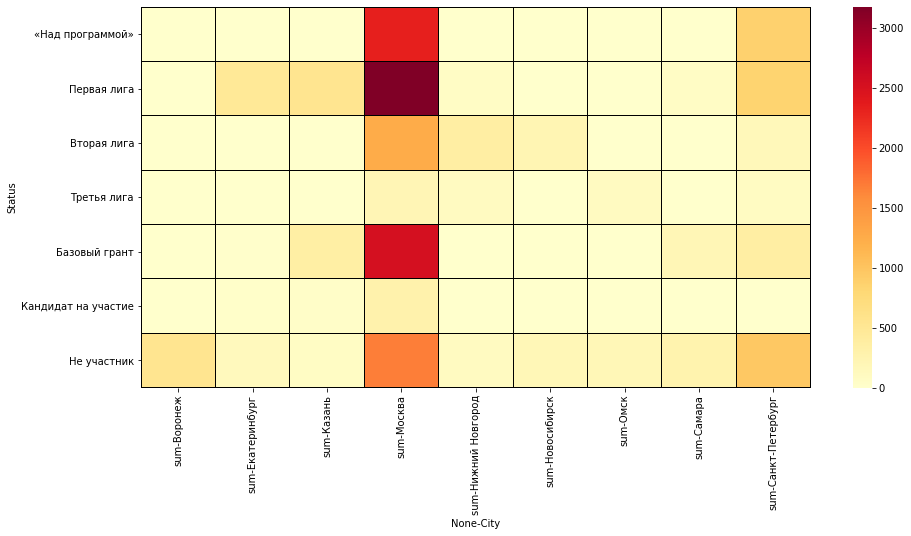

In [38]:
sns.heatmap(df_rating_heat_map_sum, cmap='YlOrRd',linewidths=0.1, linecolor='black')

 Визуализируем **количество вузов** по городам и категориям в программе **"Приоритет -2030"**.

In [39]:
df_rating_heat_map_len = pd.pivot_table(df_city_10,
                        index='Status',
                        columns='City',
                        values='Points', 
                        aggfunc=[len]).fillna(0)
df_rating_heat_map_len

len                                             \
City                Воронеж Екатеринбург Казань Москва Нижний Новгород   
Status                                                                   
«Над программой»        0.0          0.0    0.0    1.0             0.0   
Первая лига             0.0          1.0    1.0    7.0             1.0   
Вторая лига             0.0          0.0    0.0    4.0             1.0   
Третья лига             0.0          0.0    0.0    1.0             1.0   
Базовый грант           0.0          1.0    3.0   15.0             0.0   
Кандидат на участие     0.0          1.0    1.0    4.0             0.0   
Не участник            16.0         13.0   11.0   69.0             7.0   

                                                              
City                Новосибирск  Омск Самара Санкт-Петербург  
Status                                                        
«Над программой»            0.0   0.0    0.0             1.0  
Первая лига                 0.0   0.0    1.0             2.0  
Вторая лига                 2.0   0.0    0.0             2.0  
Третья лига                 0.0   1.0    0.0             1.0  
Базовый грант               0.0   0.0    1.0             6.0  
Кандидат на участие         0.0   0.0    0.0             0.0  
Не участник                14.0  11.0   11.0            48.0

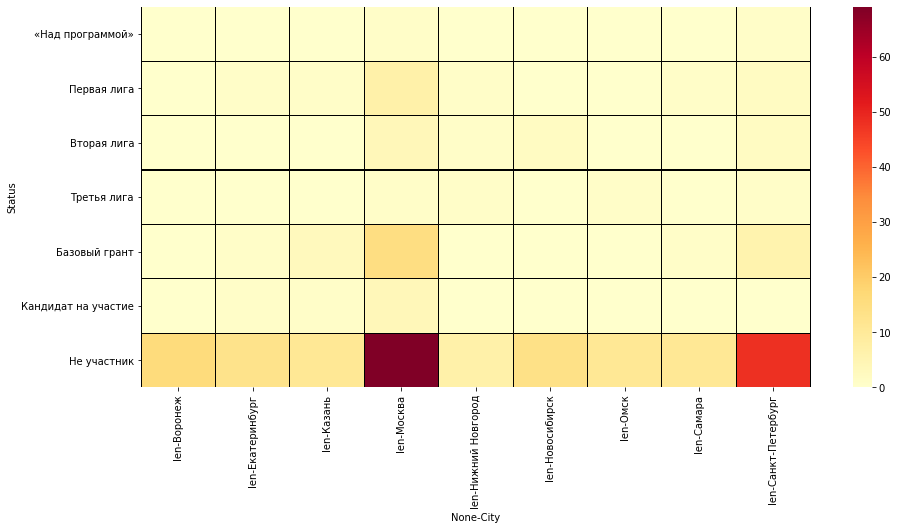

In [40]:
sns.heatmap(df_rating_heat_map_len, cmap='YlOrRd',linewidths=0.1, linecolor='black')

**Вывод:** тепловые карты демонстрируют крайную неравномерность распределения высших учебных заведений по городам России. Основная образовательная активность сосредоточена в двух столичных городах, причем, как видно из тепловой карты даже в столицах доминируют вузы не принимающие участие в программе.

Попробуем постоить тепловую карту без учёта категории **"Не участник"** для количества вузов вовлеченных в программу:

In [41]:
df_city10_in_program = df_city_10.loc[df['Status']!='Не участник']
print ('Всего вузов участвующих либо претендующих на участие в программе в городах-образовательных центрах:',
       len(df_city10_in_program))

Всего вузов участвующих либо претендующих на участие в программе в городах-образовательных центрах: 60


In [45]:
df_rating_heat_map_in_prog_sum = pd.pivot_table(df_city10_in_program,
                        index='Status',
                        columns='City',
                        values='Points', 
                        aggfunc=[len]).fillna(0)
df_rating_heat_map_in_prog_sum

len                                            \
City                Екатеринбург Казань Москва Нижний Новгород Новосибирск   
Status                                                                       
«Над программой»             0.0    0.0    1.0             0.0         0.0   
Первая лига                  1.0    1.0    7.0             1.0         0.0   
Вторая лига                  0.0    0.0    4.0             1.0         2.0   
Третья лига                  0.0    0.0    1.0             1.0         0.0   
Базовый грант                1.0    3.0   15.0             0.0         0.0   
Кандидат на участие          1.0    1.0    4.0             0.0         0.0   

                                                 
City                Омск Самара Санкт-Петербург  
Status                                           
«Над программой»     0.0    0.0             1.0  
Первая лига          0.0    1.0             2.0  
Вторая лига          0.0    0.0             2.0  
Третья лига          1.0    0.0             1.0  
Базовый грант        0.0    1.0             6.0  
Кандидат на участие  0.0    0.0             0.0

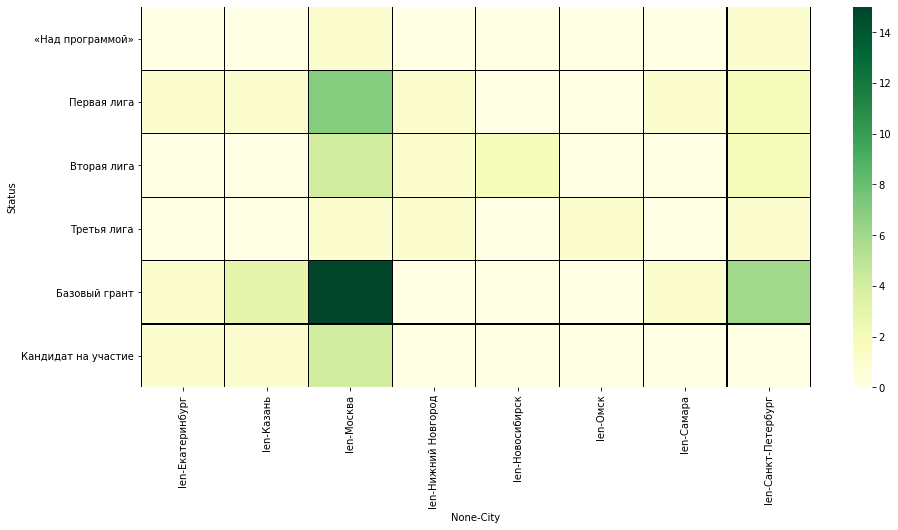

In [46]:
sns.heatmap(df_rating_heat_map_in_prog_sum, cmap='YlGn',linewidths=0.1, linecolor='black')

**Вывод:** Ожидаемо лидерами по количеству высших учебных заведений вовлеченных в программу являются Москва и Санкт-Петербург.